# Task 1: Import Packages and Load Data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [47]:
path = input('Input the data here:')
master_df = pd.read_csv(path)
master_df.head(5)

Input the data here:sales2019_12.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Task 2: Merge and Clean Data

In [3]:
master_df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
master_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


### Task 2.1: Add the 'Month' Column in the Master DataFrame 

In [4]:
master_df['Month']= master_df['Order Date'].str[0:2]
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [7]:
print(set(master_df['Month']))

{'07', '01', '09', '11', '12', '02', '06', '10', '04', '05', '03', '08'}


### Task 2.2: Get Rid of NaN and Or Value

In [5]:
master_df = master_df.dropna(how = 'all')
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [6]:
master_df = master_df[master_df['Month'] != 'Or']
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


# Task 3: Report

### Task 3.1: What was the best month for sales? How much was earned that month?

In [7]:
print(master_df['Quantity Ordered'].dtypes)
print(master_df['Price Each'].dtypes)

object
object


In [8]:
master_df['Quantity Ordered'] = pd.to_numeric(master_df['Quantity Ordered'], downcast = "integer")
master_df['Price Each'] = pd.to_numeric(master_df['Price Each'], downcast = "float")

In [9]:
master_df['Sales'] = master_df['Quantity Ordered']*master_df['Price Each']
move_col = master_df.pop('Sales')
master_df.insert(4,'Sales',move_col)
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [10]:
master_df.groupby('Month').sum()['Sales']

Month
01    3644513.5
02    4404045.0
03    5614200.5
04    6781340.5
05    6305213.5
06    5155604.5
07    5295551.5
08    4488935.5
09    4195120.0
10    7473453.5
11    6399206.5
12    9226887.0
Name: Sales, dtype: float32

In [11]:
sales_value = master_df.groupby('Month').sum()['Sales']
max_value = sales_value.max()
max_value

9226887.0

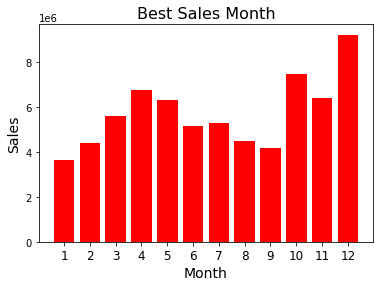

In [12]:
months = range(1,13)
plt.bar(x=months, height=sales_value, color = 'red')
plt.title('Best Sales Month', fontsize = 16)
plt.xticks(months, fontsize = 12)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.show()

### Task 3.2: What was the best city for sales? 

In [13]:
master_df[['Street', 'City', 'State']] = master_df['Purchase Address'].str.split(',', expand=True)
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,261 10th St,San Francisco,CA 94016
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,764 13th St,San Francisco,CA 94016


In [16]:
print(set(master_df['City']))

{' Portland', ' New York City', ' Atlanta', ' Boston', ' Seattle', ' San Francisco', ' Dallas', ' Austin', ' Los Angeles'}


In [17]:
master_df = master_df.dropna()
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,261 10th St,San Francisco,CA 94016
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,764 13th St,San Francisco,CA 94016


In [19]:
sales_city_value = master_df.groupby('City').sum()['Sales'].sort_values(ascending = False)
sales_city_value

City
 San Francisco    16524408.0
 Los Angeles      10905142.0
 New York City     9328635.0
 Boston            7323284.0
 Atlanta           5590997.0
 Dallas            5535951.0
 Seattle           5495511.0
 Portland          4640981.0
 Austin            3639163.5
Name: Sales, dtype: float32

In [20]:
cities = []
for city, sales in sales_city_value.items():
    cities.append(city)
print (cities)

[' San Francisco', ' Los Angeles', ' New York City', ' Boston', ' Atlanta', ' Dallas', ' Seattle', ' Portland', ' Austin']


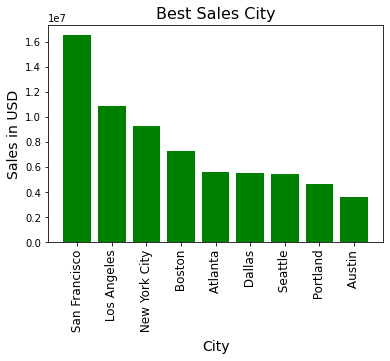

In [30]:
plt.bar(x=cities, height=sales_city_value, color = 'green')
plt.title('Best Sales City', fontsize = 16)
plt.xticks(cities, fontsize = 12, rotation = 'vertical')
plt.xlabel('City',fontsize = 14)
plt.ylabel('Sales in USD',fontsize = 14)
plt.show()

### Task 3.3: What was the best hour for sales? 

In [33]:
print(master_df['Order Date'].dtypes)

object


In [35]:
master_df['Order Date'] = pd.to_datetime(master_df['Order Date'])

In [36]:
master_df['Hour'] = master_df['Order Date'].dt.hour
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,261 10th St,San Francisco,CA 94016,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,764 13th St,San Francisco,CA 94016,0


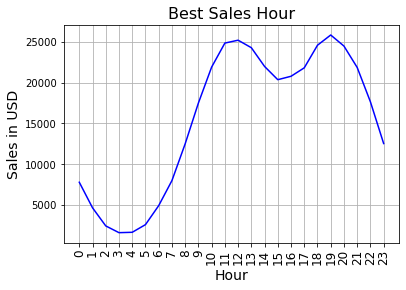

In [37]:
sales_hour_value = master_df.groupby('Hour').count()['Sales']

hours = []
for hour, sales in sales_hour_value.items():
    hours.append(hour)
    
plt.plot(hours, sales_hour_value, color = 'blue')
plt.title('Best Sales Hour', fontsize = 16)
plt.grid()
plt.xticks(hours, fontsize = 12, rotation = 'vertical')
plt.xlabel('Hour',fontsize = 14)
plt.ylabel('Sales in USD',fontsize = 14)
plt.show()

### Task 3.4: What was the best couple of products for sales? 

In [38]:
master_df_dup = master_df[master_df['Order ID'].duplicated(keep=False)]
master_df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,261 10th St,San Francisco,CA 94016,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,764 13th St,San Francisco,CA 94016,0


In [39]:
master_df_dup['All Product'] = master_df_dup.groupby('Order ID')['Product'].transform(','.join)
master_df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Street,City,State,Hour,All Product
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20,"iPhone,Lightning Charging Cable,Wired Headphon..."
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20,"iPhone,Lightning Charging Cable,Wired Headphon..."
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,942 Church St,Austin,TX 73301,20,"iPhone,Lightning Charging Cable,Wired Headphon..."
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,261 10th St,San Francisco,CA 94016,5,"Bose SoundSport Headphones,Bose SoundSport Hea..."
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,764 13th St,San Francisco,CA 94016,0,"34in Ultrawide Monitor,34in Ultrawide Monitor"


In [40]:
master_df_dup = master_df_dup[['Order ID', 'All Product']].drop_duplicates()
master_df_dup.head()

,Order ID,All Product
0,162009,"iPhone,Lightning Charging Cable,Wired Headphon..."
3,162010,"Bose SoundSport Headphones,Bose SoundSport Hea..."
4,162011,"34in Ultrawide Monitor,34in Ultrawide Monitor"
5,162012,"AA Batteries (4-pack),AA Batteries (4-pack)"
6,162013,"34in Ultrawide Monitor,34in Ultrawide Monitor"


In [41]:
master_df_dup['All Product'].value_counts().head(10)

Lightning Charging Cable,Lightning Charging Cable        19831
AAA Batteries (4-pack),AAA Batteries (4-pack)            19826
AA Batteries (4-pack),AA Batteries (4-pack)              19809
USB-C Charging Cable,USB-C Charging Cable                19792
Wired Headphones,Wired Headphones                        17208
Apple Airpods Headphones,Apple Airpods Headphones        14575
Bose SoundSport Headphones,Bose SoundSport Headphones    12505
27in FHD Monitor,27in FHD Monitor                         7213
27in 4K Gaming Monitor,27in 4K Gaming Monitor             5979
34in Ultrawide Monitor,34in Ultrawide Monitor             5935
Name: All Product, dtype: int64

### Task 3.5: What is the best product for sales?

In [23]:
all_product = master_df.groupby('Product').sum()['Quantity Ordered']
all_product

Product
20in Monitor                   8258.0
27in 4K Gaming Monitor        12488.0
27in FHD Monitor              15100.0
34in Ultrawide Monitor        12398.0
AA Batteries (4-pack)         55270.0
AAA Batteries (4-pack)        62034.0
Apple Airpods Headphones      31322.0
Bose SoundSport Headphones    26914.0
Flatscreen TV                  9638.0
Google Phone                  11064.0
LG Dryer                       1292.0
LG Washing Machine             1332.0
Lightning Charging Cable      46434.0
Macbook Pro Laptop             9456.0
ThinkPad Laptop                8260.0
USB-C Charging Cable          47950.0
Vareebadd Phone                4136.0
Wired Headphones              41114.0
iPhone                        13698.0
Name: Quantity Ordered, dtype: float64

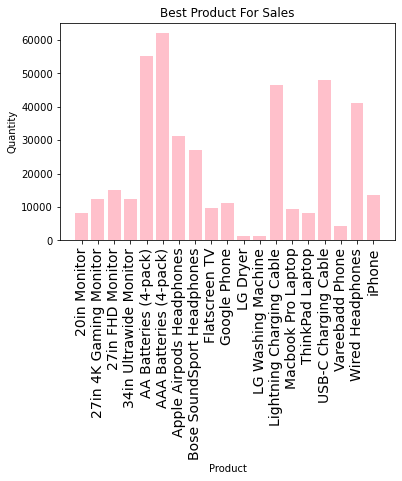

In [24]:
products = []
for pro, quant in all_product.items():
    products.append(pro)
plt.bar(products, all_product, color = 'pink')
plt.title('Best Product For Sales')
plt.xticks(products, rotation = 90, fontsize = 14)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

In [25]:
prices = master_df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_89925/582624761.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, size = 8, rotation = 'vertical')


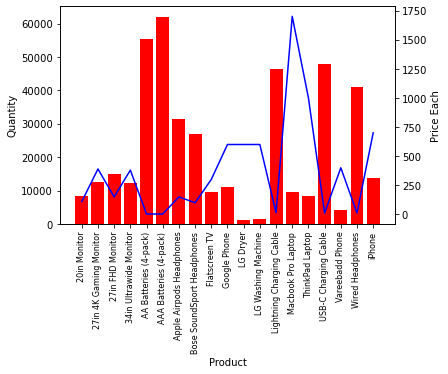

In [38]:
x = products
y1 = all_product
y2 = prices

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'red')
ax2.plot(x, y2,'b-')

ax1.set_xticklabels(products, size = 8, rotation = 'vertical')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price Each')

plt.show()

# SIUUUUUUUUUUUUUUUUUUU!!!!